# Importing modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset and analysis

In [3]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# to display statistics about the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# to display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# to display the number of samples for each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Preprocessing the dataset

In [13]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory data analysis

<AxesSubplot:>

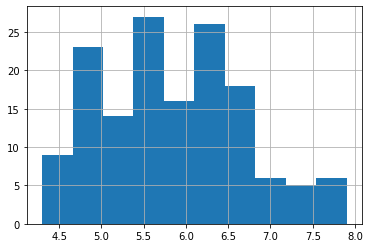

In [16]:
# Plotting histograms
df['sepal_length'].hist()

<AxesSubplot:>

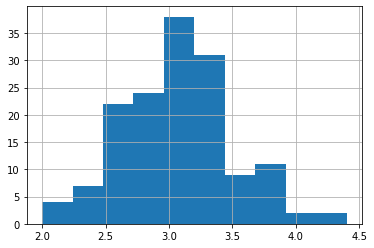

In [17]:
df['sepal_width'].hist()

<AxesSubplot:>

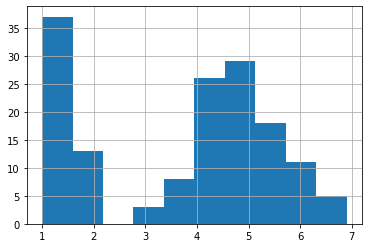

In [18]:
df['petal_length'].hist()

<AxesSubplot:>

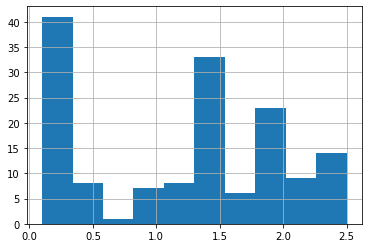

In [19]:
df['petal_width'].hist()

In [20]:
# scatterplot
colours = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

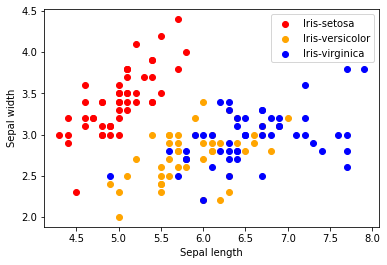

In [27]:
for i in range (3):
    x = df[df["species"]==species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colours[i], label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()

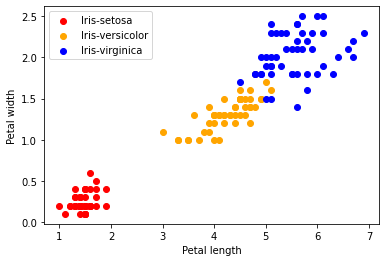

In [29]:
for i in range (3):
    x = df[df["species"]==species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colours[i], label=species[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

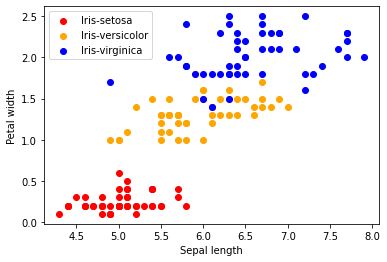

In [31]:
for i in range (3):
    x = df[df["species"]==species[i]]
    plt.scatter(x['sepal_length'], x['petal_width'], c=colours[i], label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("Petal width")
plt.legend()

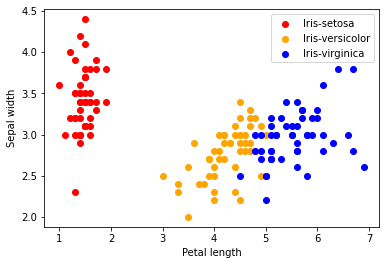

In [32]:
for i in range (3):
    x = df[df["species"]==species[i]]
    plt.scatter(x['petal_length'], x['sepal_width'], c=colours[i], label=species[i])
plt.xlabel("Petal length")
plt.ylabel("Sepal width")
plt.legend()

# Correlation matrix

<AxesSubplot:>

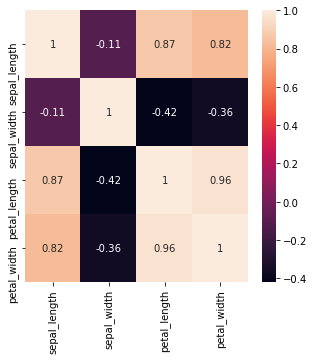

In [37]:
corr = df.corr()
fig, axis = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, ax=axis)

# Label encoder

In [38]:
# This is basically to transform the labels into numeric form such that is is machine readable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model training

In [44]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [47]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [48]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [52]:
# Checking the accuracy of the model
print("Accuracy: ", model.score(x_test, y_test)*100, " %")

Accuracy:  95.55555555555556  %


In [58]:
# Now we import another model
#knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [60]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
# accuracy has improved
print("Accuracy: ", model.score(x_test, y_test)*100, " %")

Accuracy:  97.77777777777777  %
